# Data Pipeline

#### Working from existing pipeline from previous progress reports

### Part 1: Webscraping news articles. Data pipeline [here](scraping_scripts.ipynb)

#### Install packages

In [1]:
import html5lib
import bs4
import requests
from bs4 import BeautifulSoup
import urllib
import urllib.request
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json

#### Creating list of Vox articles to parse

In [2]:
vox_URLs = ['https://www.vox.com/the-logoff-newsletter-trump/407468/trump-tariff-market-crash-economy-recession', 
            'https://www.vox.com/politics/407296/stagflation-trump-tariffs-recession-inflation-risk-odds', 
            'https://www.vox.com/donald-trump/407337/trump-tariffs-risk-split-lose-gop-winning-coalition-majority-disapprove-opinion-latino-black-gen-z', 
            'https://www.vox.com/culture/407365/nintendo-switch-2-delay-preorder-tariff-trump-how-to', 
            'https://www.vox.com/the-logoff-newsletter-trump/407344/laura-loomer-trump-nsa-director', 
            'https://www.vox.com/politics/407222/trump-tariff-loomer-kennedy', 
            'https://www.vox.com/scotus/407196/supreme-court-trump-tariffs-emily-ley-paper', 
            'https://www.vox.com/today-explained-podcast/407112/trump-tariffs-china-vietnam-south-korea', 
            'https://www.vox.com/politics/407111/trump-tariff-formula-calculation-russia-economy-dow-sp', 
            'https://www.vox.com/politics/407053/trump-tariff-expensive-democracy-authoritarianism-breakdown', 
            'https://www.vox.com/scotus/407051/supreme-court-trump-tariffs-major-questions', 
            'https://www.vox.com/politics/407025/trump-tariffs-reciprocal-trade-war-why-explanation-nostalgia', 
            'https://www.vox.com/politics/406934/wisconsin-electorate-liberal-democratic-turnout-election-trump-voter-republican', 
            'https://www.vox.com/the-logoff-newsletter-trump/406939/trump-tariffs-logoff', 
            'https://www.vox.com/politics/406467/trump-tariffs-prices-liberation-day-economy', 
            'https://www.vox.com/scotus/406879/supreme-court-planned-parenthood-south-carolina-medina-medicaid-abortion', 
            'https://www.vox.com/immigration/406697/trump-immigration-deportation-poll-public-opinion-economy-approval-border', 
            'https://www.vox.com/on-the-right-newsletter/406672/trump-student-deportations-rumeysa-ozturk-campus-free-speech', 
            'https://www.vox.com/politics/406742/wisconsin-supreme-court-election-results-susan-crawford-brad-schimel-elon-musk-democrats', 
            'https://www.vox.com/scotus/406719/trump-attack-immigrants-supreme-court', 
            'https://www.vox.com/politics/406690/trump-el-salvador-deportation-prison-court', 
            'https://www.vox.com/policy/406637/hasan-piker-gop-trump-gen-z-democrats-woke', 
            'https://www.vox.com/politics/406606/cory-booker-marathon-speech-filibuster-senate-floor-briefly-explained-protest', 
            'https://www.vox.com/politics/405748/democrats-leader-michelle-obama-savior-sanders-aoc-walz-biden-harris',
            'https://www.vox.com/the-logoff-newsletter-trump/406531/trump-third-presidential-term-constitution-briefly-explained']
len(vox_URLs)

25

#### Creating list of Fox articles to parse

In [3]:
fox_URLs = ['https://www.foxnews.com/politics/musk-spars-white-house-advisor-peter-navarro-dumber-than-sack-bricks', 
            'https://www.foxnews.com/politics/gabbard-establishes-new-intelligence-community-task-force-restore-transparency', 
            'https://www.foxnews.com/politics/trump-backed-bill-rein-federal-judges-gets-house-wide-vote', 
            'https://www.foxnews.com/media/pam-bondi-warns-migrant-criminals-coming-after-you-supreme-court-lifts-stay-deportations', 
            'https://www.foxnews.com/politics/trump-hauls-millions-house-gop-2026-war-chest-dems-taunt-running-scared', 
            'https://www.foxnews.com/politics/white-house-us-lead-ai-china-catching-up', 
            'https://www.foxnews.com/politics/huckabee-nomination-clears-senate-hurdle-us-ambassador-israel', 
            'https://www.foxnews.com/politics/elbridge-colby-confirmed-top-pentagon-policy-post-after-hesitation-from-gop-hawks', 
            'https://www.foxnews.com/sports/maine-lawmakers-send-letter-trump-condemning-gov-janet-mills-over-trans-athlete-girls-sports-policies', 
            'https://www.foxnews.com/politics/house-republicans-worry-even-trump-cant-save-them-tax-cuts-budget-bill-hang-balance', 
            'https://www.foxnews.com/politics/trump-hegseth-reveal-whopping-figure-want-next-pentagon-budget', 
            'https://www.foxnews.com/politics/white-house-us-lead-ai-china-catching-up', 
            'https://www.foxnews.com/world/us-panama-taking-back-canal-from-chinas-influence-says-hegseth', 
            'https://www.foxnews.com/media/trump-more-like-soaring-eagle-than-lame-duck-record-number-executive-orders-polling-expert-says', 
            'https://www.foxnews.com/politics/huckabee-nomination-clears-senate-hurdle-us-ambassador-israel', 
            'https://www.foxnews.com/media/james-carville-warns-country-high-alert-asked-trump-might-try-rig-midterms', 
            'https://www.foxnews.com/politics/us-federal-agencies-unleash-coal-energy-after-biden-stifled-it-mine-baby-mine', 
            'https://www.foxnews.com/politics/trumps-crypto-chief-golden-age-digital-assets', 
            'https://www.foxnews.com/politics/dem-accuses-trump-admin-fire-sale-approach-gop-aims-lower-federal-govs-real-estate-portfolio', 
            'https://www.foxnews.com/politics/elbridge-colby-confirmed-top-pentagon-policy-post-after-hesitation-from-gop-hawks', 
            'https://www.foxnews.com/politics/many-failures-whistleblower-exposes-how-biden-era-official-soft-china-prioritized-dei', 
            'https://www.foxnews.com/politics/house-republicans-worry-even-trump-cant-save-them-tax-cuts-budget-bill-hang-balance', 
            'https://www.foxnews.com/politics/supreme-court-trump-probationary-federal-workers-ruling', 
            'https://www.foxnews.com/politics/scoop-treasury-secretary-bessent-huddle-key-republican-caucus-trump-enacts-tariff-plan', 
            'https://www.foxnews.com/media/usha-vance-reveals-how-switch-flipped-after-husband-joined-trump-ticket-says-maga-has-totally-welcomed-her']
len(fox_URLs)

25

#### Testing scraping on Pitt Linguistics webpages

In [4]:
'''import html5lib
import bs4
import requests
from bs4 import BeautifulSoup
import time

headers = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9"}
pitt_URLs = ['https://www.linguistics.pitt.edu/graduate/ma-program', 'https://www.linguistics.pitt.edu/research', 'https://www.linguistics.pitt.edu/esl-tesol', 'https://www.linguistics.pitt.edu/languages']

pitt_data = []
for url in pitt_URLs:
    pitt_r = requests.get(url=url, headers=headers)
    #print(pitt_r.content[:1000])
    pitt_soup = BeautifulSoup(pitt_r.content, 'html5lib')
    #print(pitt_soup.prettify())
    table = pitt_soup.find('header')
    for row in table.find('div'):
        pitt_article = {}
        pitt_article['headline'] = table.find('li')
        pitt_data.append(pitt_article)
    time.sleep(10)
print(pitt_data[:1000])'''

'import html5lib\nimport bs4\nimport requests\nfrom bs4 import BeautifulSoup\nimport time\n\nheaders = {\'User-Agent\': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9"}\npitt_URLs = [\'https://www.linguistics.pitt.edu/graduate/ma-program\', \'https://www.linguistics.pitt.edu/research\', \'https://www.linguistics.pitt.edu/esl-tesol\', \'https://www.linguistics.pitt.edu/languages\']\n\npitt_data = []\nfor url in pitt_URLs:\n    pitt_r = requests.get(url=url, headers=headers)\n    #print(pitt_r.content[:1000])\n    pitt_soup = BeautifulSoup(pitt_r.content, \'html5lib\')\n    #print(pitt_soup.prettify())\n    table = pitt_soup.find(\'header\')\n    for row in table.find(\'div\'):\n        pitt_article = {}\n        pitt_article[\'headline\'] = table.find(\'li\')\n        pitt_data.append(pitt_article)\n    time.sleep(10)\nprint(pitt_data[:1000])'

### Part 2: Linguistic analysis of data

#### Starting with the Fox dataset

In [5]:
#reading in dataframe
fox_df = pd.read_csv('fox.csv')

In [6]:
#'tokens' column with tokenized text
fox_df["tokens"] = fox_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'length' column with article length in words
fox_df["length"] = fox_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
fox_df["word_length"] = fox_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
fox_df["avg_word_length"] = fox_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
fox_df["freqdist"] = fox_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized
fox_df["bigrams"] = fox_df.apply(lambda row: list(nltk.bigrams(row["tokens"])), axis=1)



In [7]:
fox_df.head()

,headline,text,Source,tokens,length,word_length,avg_word_length,freqdist,bigrams
0,Musk spars with White House trade advisor Pete...,SpaceX and Tesla CEO Elon Musk sparred on soci...,Fox News,"[spacex, and, tesla, ceo, elon, musk, sparred,...",606,"[6, 3, 5, 3, 4, 4, 7, 2, 6, 5, 7, 4, 5, 5, 6, ...",4.217822,"{'spacex': 1, 'and': 9, 'tesla': 3, 'ceo': 1, ...","[(spacex, and), (and, tesla), (tesla, ceo), (c..."
1,Gabbard establishes new intelligence community...,EXCLUSIVE: Director of National Intelligence T...,Fox News,"[exclusive, :, director, of, national, intelli...",723,"[9, 1, 8, 2, 8, 12, 5, 7, 11, 1, 3, 4, 5, 7, 4...",5.199170,"{'exclusive': 1, ':': 2, 'director': 5, 'of': ...","[(exclusive, :), (:, director), (director, of)..."
2,Trump-backed bill to rein in federal judges ge...,The House of Representatives is expected to vo...,Fox News,"[the, house, of, representatives, is, expected...",534,"[3, 5, 2, 15, 2, 8, 2, 4, 7, 2, 1, 4, 2, 5, 7,...",4.453184,"{'the': 23, 'house': 8, 'of': 7, 'representati...","[(the, house), (house, of), (of, representativ..."
3,Pam Bondi warns migrant criminals 'we're comin...,Attorney General Pam Bondi warned illegal immi...,Fox News,"[attorney, general, pam, bondi, warned, illega...",451,"[8, 7, 3, 5, 6, 7, 9, 9, 2, 5, 7, 5, 4, 5, 3, ...",4.352550,"{'attorney': 1, 'general': 1, 'pam': 1, 'bondi...","[(attorney, general), (general, pam), (pam, bo..."
4,Trump hauls in millions for House GOP 2026 war...,FIRST ON FOX — As congressional Republicans ge...,Fox News,"[first, on, fox, —, as, congressional, republi...",812,"[5, 2, 3, 1, 2, 13, 11, 4, 2, 3, 1, 8, 6, 2, 3...",4.433498,"{'first': 1, 'on': 6, 'fox': 4, '—': 1, 'as': ...","[(first, on), (on, fox), (fox, —), (—, as), (a..."


#### Creating list of all Fox News word tokens for further linguistic analysis

In [8]:
fox_all_toks = []
for i in range(len(fox_df)):
    fox_all_toks += fox_df["tokens"][i]
len(fox_all_toks)

20442

#### Adding POS tags to Fox tokens

In [9]:
fox_all_toks_pos = nltk.pos_tag(fox_all_toks)
fox_all_toks_pos[:10]

[('spacex', 'NN'),
 ('and', 'CC'),
 ('tesla', 'NN'),
 ('ceo', 'NN'),
 ('elon', 'NN'),
 ('musk', 'NN'),
 ('sparred', 'VBD'),
 ('on', 'IN'),
 ('social', 'JJ'),
 ('media', 'NNS')]

#### Creating list of all Fox News bigram tokens for further linguistic analysis

In [10]:
fox_all_bigrams = []
for i in range(len(fox_df)):
    fox_all_bigrams += fox_df["bigrams"][i]
len(fox_all_bigrams)

20417

#### Same procedure for the Fox Opinion articles

In [11]:
#reading in dataframe
fox_oped_df = pd.read_csv('fox_opinion.csv')

#'tokens' column with tokenized text
fox_oped_df["tokens"] = fox_oped_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'length' column with article length in words
fox_oped_df["length"] = fox_oped_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
fox_oped_df["word_length"] = fox_oped_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
fox_oped_df["avg_word_length"] = fox_oped_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
fox_oped_df["freqdist"] = fox_oped_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized
fox_oped_df["bigrams"] = fox_oped_df.apply(lambda row: list(nltk.bigrams(row["tokens"])), axis=1)

In [12]:
fox_oped_df.head()

,headline,text,Source,tokens,length,word_length,avg_word_length,freqdist,bigrams
0,Why 'toxic masculinity' is a dangerous and ter...,The idea of ‘toxic masculinity’ has been one o...,Fox News Opinion,"[the, idea, of, ‘, toxic, masculinity, ’, has,...",688,"[3, 4, 2, 1, 5, 11, 1, 3, 4, 3, 2, 3, 7, 6, 11...",3.776163,"{'the': 29, 'idea': 1, 'of': 13, '‘': 1, 'toxi...","[(the, idea), (idea, of), (of, ‘), (‘, toxic),..."
1,DAVID MARCUS: Democrats know 'judge shopping' ...,It is often said that a good baseball umpire g...,Fox News Opinion,"[it, is, often, said, that, a, good, baseball,...",1010,"[2, 2, 5, 4, 4, 1, 4, 8, 6, 4, 3, 3, 9, 5, 1, ...",4.279208,"{'it': 8, 'is': 18, 'often': 1, 'said': 2, 'th...","[(it, is), (is, often), (often, said), (said, ..."
2,MORNING GLORY: How the Senate and House find $...,"Hear me out, members (and staffs) of the House...",Fox News Opinion,"[hear, me, out, ,, members, (, and, staffs, ),...",1460,"[4, 2, 3, 1, 7, 1, 3, 6, 1, 2, 3, 5, 4, 3, 5, ...",4.132192,"{'hear': 1, 'me': 1, 'out': 3, ',': 48, 'membe...","[(hear, me), (me, out), (out, ,), (,, members)..."
3,SEN ELIZABETH WARREN: Social Security is under...,"Gutting Social Security isn’t ""efficient"" —&nb...",Fox News Opinion,"[gutting, social, security, isn, ’, t, ``, eff...",1152,"[7, 6, 8, 3, 1, 1, 2, 9, 2, 1, 1, 4, 1, 2, 1, ...",4.168403,"{'gutting': 3, 'social': 23, 'security': 24, '...","[(gutting, social), (social, security), (secur..."
4,LIZ PEEK: Cory Booker’s latest stunt could emb...,"Cory Booker, fresh off demonstrating that he i...",Fox News Opinion,"[cory, booker, ,, fresh, off, demonstrating, t...",1230,"[4, 6, 1, 5, 3, 13, 4, 2, 2, 7, 2, 5, 2, 5, 7,...",4.278049,"{'cory': 3, 'booker': 10, ',': 68, 'fresh': 1,...","[(cory, booker), (booker, ,), (,, fresh), (fre..."


In [13]:
#creating list of all Fox Opinion tokens
fox_oped_all_toks = []
for i in range(len(fox_oped_df)):
    fox_oped_all_toks += fox_oped_df["tokens"][i]

#creating list of all Fox Opinion tokens with POS
fox_oped_all_toks_pos = nltk.pos_tag(fox_all_toks)

#creating list of all Fox Opinion bigrams
fox_oped_all_bigrams = []
for i in range(len(fox_oped_df)):
    fox_oped_all_bigrams += fox_oped_df["bigrams"][i]

#### Now for the Vox dataset

In [14]:
#reading in dataframe
vox_df = pd.read_csv('vox.csv')

In [15]:
#flattening 'text' column
vox_df["text"] = vox_df["text"].apply(eval).apply(' '.join)
vox_df.head()

,headline,subheading,text,Source
0,"Trump’s tariff-driven market crash, briefly ex...","The Dow has lost more than 4,000 points since ...","This story appeared in The Logoff, a daily new...",Vox
1,America may be headed for this rare type of ec...,"Stagflation, explained.",President Donald Trump’s decision to impose la...,Vox
2,Trump’s tariffs risk destroying his winning co...,"Already distrusted on the economy, Trump’s tar...",As markets tank and the prospect of higher pri...,Vox
3,How the Nintendo Switch 2 delay explains Trump...,Trump threw a blue shell at Nintendo — and the...,It was a big week for the global economy — and...,Vox
4,A conspiracy theorist convinced Trump to fire ...,"Laura Loomer, a 9/11 truther, apparently gets ...","This story appeared in The Logoff, a daily new...",Vox


In [16]:
#exporting flattened text dataframe to csv for later use (if needed)
vox_df.to_csv('vox_flat.csv', index=False)

In [17]:
#'tokens' column with tokenized text
vox_df["tokens"] = vox_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'length' column with article length in words
vox_df["length"] = vox_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
vox_df["word_length"] = vox_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
vox_df["avg_word_length"] = vox_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
vox_df["freqdist"] = vox_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized
vox_df["bigrams"] = vox_df.apply(lambda row: list(nltk.bigrams(row["tokens"])), axis=1)

In [18]:
vox_df.head()

,headline,subheading,text,Source,tokens,length,word_length,avg_word_length,freqdist,bigrams
0,"Trump’s tariff-driven market crash, briefly ex...","The Dow has lost more than 4,000 points since ...","This story appeared in The Logoff, a daily new...",Vox,"[this, story, appeared, in, the, logoff, ,, a,...",489,"[4, 5, 8, 2, 3, 6, 1, 1, 5, 10, 4, 5, 3, 4, 8,...",4.206544,"{'this': 5, 'story': 1, 'appeared': 1, 'in': 4...","[(this, story), (story, appeared), (appeared, ..."
1,America may be headed for this rare type of ec...,"Stagflation, explained.",President Donald Trump’s decision to impose la...,Vox,"[president, donald, trump, ’, s, decision, to,...",1681,"[9, 6, 5, 1, 1, 8, 2, 6, 5, 7, 2, 3, 7, 7, 3, ...",4.453302,"{'president': 2, 'donald': 1, 'trump': 13, '’'...","[(president, donald), (donald, trump), (trump,..."
2,Trump’s tariffs risk destroying his winning co...,"Already distrusted on the economy, Trump’s tar...",As markets tank and the prospect of higher pri...,Vox,"[as, markets, tank, and, the, prospect, of, hi...",767,"[2, 7, 4, 3, 3, 8, 2, 6, 6, 7, 4, 4, 1, 3, 6, ...",4.432855,"{'as': 6, 'markets': 1, 'tank': 1, 'and': 23, ...","[(as, markets), (markets, tank), (tank, and), ..."
3,How the Nintendo Switch 2 delay explains Trump...,Trump threw a blue shell at Nintendo — and the...,It was a big week for the global economy — and...,Vox,"[it, was, a, big, week, for, the, global, econ...",931,"[2, 3, 1, 3, 4, 3, 3, 6, 7, 1, 3, 3, 6, 1, 2, ...",4.250269,"{'it': 10, 'was': 3, 'a': 21, 'big': 1, 'week'...","[(it, was), (was, a), (a, big), (big, week), (..."
4,A conspiracy theorist convinced Trump to fire ...,"Laura Loomer, a 9/11 truther, apparently gets ...","This story appeared in The Logoff, a daily new...",Vox,"[this, story, appeared, in, the, logoff, ,, a,...",518,"[4, 5, 8, 2, 3, 6, 1, 1, 5, 10, 4, 5, 3, 4, 8,...",4.193050,"{'this': 4, 'story': 2, 'appeared': 1, 'in': 6...","[(this, story), (story, appeared), (appeared, ..."


#### Creating list of all Vox word tokens for further linguistic analysis

In [19]:
vox_all_toks = []
for i in range(len(vox_df)):
    vox_all_toks += vox_df["tokens"][i]
len(vox_all_toks)

31689

#### Adding POS tags to Vox tokens

In [20]:
vox_all_toks_pos = nltk.pos_tag(vox_all_toks)
vox_all_toks_pos[:10]

[('this', 'DT'),
 ('story', 'NN'),
 ('appeared', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('logoff', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('daily', 'JJ'),
 ('newsletter', 'NN')]

#### Creating list of all Vox bigram tokens for further linguistic analysis

In [21]:
vox_all_bigrams = []
for i in range(len(vox_df)):
    vox_all_bigrams += vox_df["bigrams"][i]
len(vox_all_bigrams)

31664

#### Same procedure for the Vox opinion (The Big Idea) articles

In [37]:
#reading in dataframe
vox_oped_df = pd.read_csv('vox_opinion.csv')

#flattening 'text' column
vox_oped_df["text"] = vox_oped_df["text"].apply(eval).apply(' '.join)

#'tokens' column with tokenized text
vox_oped_df["tokens"] = vox_oped_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'length' column with article length in words
vox_oped_df["length"] = vox_oped_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
vox_oped_df["word_length"] = vox_oped_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
vox_oped_df["avg_word_length"] = vox_oped_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
vox_oped_df["freqdist"] = vox_oped_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

#bigrams tokenized
vox_oped_df["bigrams"] = vox_oped_df.apply(lambda row: list(nltk.bigrams(row["tokens"])), axis=1)

In [38]:
vox_oped_df.head()

,headline,subheading,text,Source,tokens,length,word_length,avg_word_length,freqdist,bigrams
0,Is it anti-Catholic to ask Amy Coney Barrett h...,President Trump’s nominee has written about ho...,"Twenty-two years ago Amy Coney Barrett, then a...",Vox The Big Idea,"[twenty-two, years, ago, amy, coney, barrett, ...",2373,"[10, 5, 3, 3, 5, 7, 1, 4, 1, 3, 5, 4, 2, 5, 3,...",4.506953,"{'twenty-two': 1, 'years': 1, 'ago': 1, 'amy':...","[(twenty-two, years), (years, ago), (ago, amy)..."
1,The Putin paradox: he’s brutally repressive — ...,"We ignore history, and evidence, if we conclud...",It is perhaps a distinctly American faith that...,Vox The Big Idea,"[it, is, perhaps, a, distinctly, american, fai...",1772,"[2, 2, 7, 1, 10, 8, 5, 4, 14, 4, 7, 9, 8, 5, 4...",4.422122,"{'it': 11, 'is': 20, 'perhaps': 1, 'a': 38, 'd...","[(it, is), (is, perhaps), (perhaps, a), (a, di..."
2,Online shopping is terrible for the environmen...,The environmental impact of online shopping on...,"With Black Friday, Cyber Monday, and the holid...",Vox The Big Idea,"[with, black, friday, ,, cyber, monday, ,, and...",1439,"[4, 5, 6, 1, 5, 6, 1, 3, 3, 8, 5, 6, 3, 6, 1, ...",4.530229,"{'with': 9, 'black': 1, 'friday': 1, ',': 65, ...","[(with, black), (black, friday), (friday, ,), ..."
3,Why letting ex-felons vote probably won’t swin...,We analyzed ex-felons with voting rights. Thei...,Florida voters will soon decide whether to ret...,Vox The Big Idea,"[florida, voters, will, soon, decide, whether,...",1405,"[7, 6, 4, 4, 6, 7, 2, 6, 3, 5, 2, 4, 2, 6, 3, ...",4.617794,"{'florida': 13, 'voters': 5, 'will': 2, 'soon'...","[(florida, voters), (voters, will), (will, soo..."
4,"Trump’s birthright citizenship proposal, expla...",The faulty legal logic behind Trump’s birthrig...,President Donald Trump’s proposal to end birth...,Vox The Big Idea,"[president, donald, trump, ’, s, proposal, to,...",1495,"[9, 6, 5, 1, 1, 8, 2, 3, 10, 11, 1, 1, 6, 4, 1...",4.496990,"{'president': 5, 'donald': 1, 'trump': 11, '’'...","[(president, donald), (donald, trump), (trump,..."


In [39]:
#creating list of all Vox opinion tokens
vox_oped_all_toks = []
for i in range(len(vox_oped_df)):
    vox_oped_all_toks += vox_oped_df["tokens"][i]

#creating list of all Vox opinion tokens with POS
vox_oped_all_toks_pos = nltk.pos_tag(vox_all_toks)

#creating list of all Vox opinion bigrams
vox_oped_all_bigrams = []
for i in range(len(vox_oped_df)):
    vox_oped_all_bigrams += vox_oped_df["bigrams"][i]

### Part 3: Unigram Analysis

#### First, re-introducing tokenized word lists for all Fox News and all Vox articles

In [22]:
len(fox_all_toks), len(vox_all_toks)

(20442, 31689)

#### Now for Fox News and Vox opinion articles

In [40]:
len(fox_oped_all_toks), len(vox_oped_all_toks)

(25385, 48751)

#### Creating frequency distributions for each word list

Frequency Distribution (with stopwords)

In [43]:
#With stopwords included

#Fox News frequency distribution
fox_freq = nltk.FreqDist(fox_all_toks)

#Fox Opinion frequency distribution
fox_oped_freq = nltk.FreqDist(fox_oped_all_toks)

#Vox frequency distribution
vox_freq = nltk.FreqDist(vox_all_toks)

#Vox The Big Idea frequency distribution
vox_oped_freq = nltk.FreqDist(vox_oped_all_toks)

Frequency Distribution adjusted to remove stopwords

In [48]:
#stopwords removed
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punct = ['.', '""', '``', '&', ',', ';', ':', "''", "'", '(', ')', 'nbsp']

#Fox News frequency distribution (without stopwords)
fox_toks_ns = [word for word in fox_all_toks if word not in stopwords and word not in punct]
fox_freq_ns = nltk.FreqDist(fox_toks_ns)

#Fox Opinion frequency distribution (without stopwords)
fox_oped_toks_ns = [word for word in fox_oped_all_toks if word not in stopwords and word not in punct]
fox_oped_freq_ns = nltk.FreqDist(fox_oped_toks_ns)

#Vox frequency distribution (without stopwords)
vox_toks_ns = [word for word in vox_all_toks if word not in stopwords and word not in punct]
vox_freq_ns = nltk.FreqDist(vox_toks_ns)

#Vox The Big Idea frequency distribution (without stopwords)
vox_oped_toks_ns = [word for word in vox_oped_all_toks if word not in stopwords and word not in punct]
vox_oped_freq_ns = nltk.FreqDist(vox_oped_toks_ns)



#### Looking at the 100 most common words in each word list

In [44]:
#Fox News top 100 words
fox_top100 = fox_freq.most_common(100)
#Vox top 100 words
vox_top100 = vox_freq.most_common(100)
#Fox Opinion top 100 words
fox_oped_top100 = fox_oped_freq.most_common(100)
#Vox The Big Idea top 100 words
vox_oped_top100 = vox_oped_freq.most_common(100)

In [26]:
#viewing first 10 of most common 100 words (Fox News)
for i in fox_top100[:10]:
    print(i)

('the', 1076)
(',', 920)
('to', 645)
('.', 512)
('and', 400)
('``', 389)
('of', 379)
('a', 304)
('in', 300)
("''", 280)


In [45]:
#viewing first 10 of most common 100 words (Fox News Opinion)
for i in fox_oped_top100[:10]:
    print(i)

(',', 1071)
('the', 1034)
('.', 732)
(';', 689)
('&', 676)
('nbsp', 675)
('to', 628)
('and', 544)
('of', 482)
('a', 388)


In [27]:
#viewing first 10 of most common 100 words (Vox)
for i in vox_top100[:10]:
    print(i)

(',', 1481)
('the', 1419)
('.', 1154)
('to', 801)
('of', 678)
('’', 677)
('a', 639)
('and', 626)
('in', 536)
('that', 520)


In [46]:
#viewing first 10 of most common 100 words (Vox The Big Idea)
for i in vox_oped_top100[:10]:
    print(i)

('the', 2646)
(',', 2187)
('.', 1711)
('of', 1327)
('to', 1200)
('and', 962)
('a', 933)
('in', 793)
('that', 726)
('’', 598)


#### WordCloud Visualizations (stopwords removed)

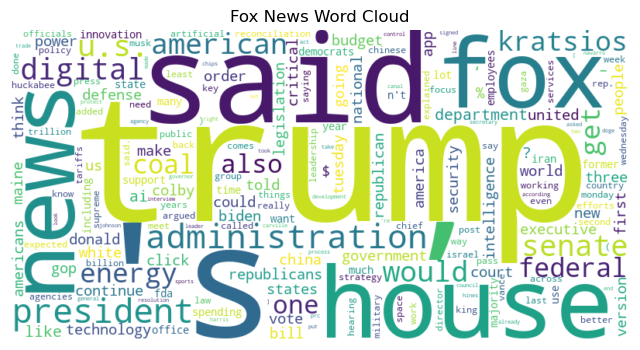

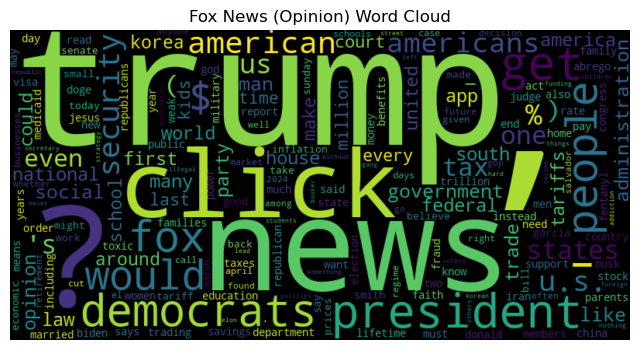

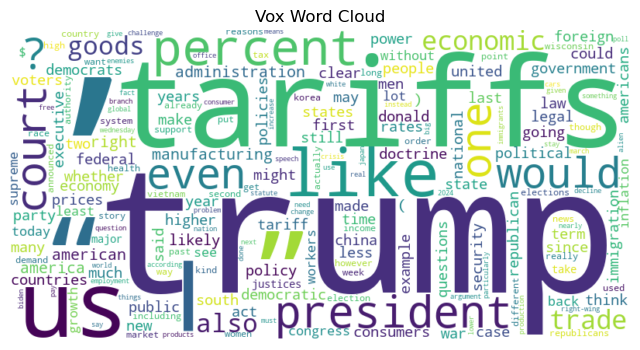

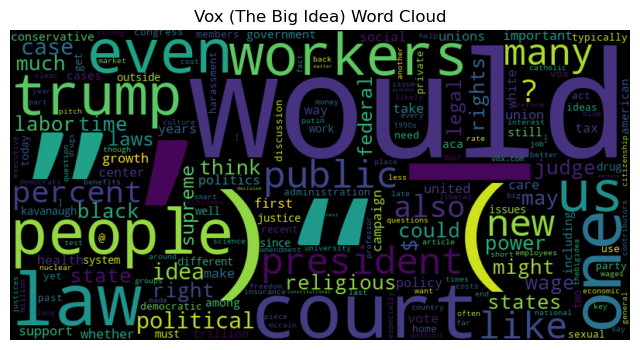

In [51]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Fox News word cloud
fox_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(fox_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News Word Cloud')
plt.show()

#Fox Opinion word cloud
fox_oped_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(fox_oped_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(fox_oped_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News (Opinion) Word Cloud')
plt.show()

#Vox word cloud
vox_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(vox_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox Word Cloud')
plt.show()

#Vox (The Big Idea) word cloud
vox_oped_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(vox_oped_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(vox_oped_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox (The Big Idea) Word Cloud')
plt.show()

### Part 4: Bigram Analysis

#### First, re-introducing tokenized bigram lists for all Fox News and all Vox articles

In [29]:
len(fox_all_bigrams), len(vox_all_bigrams)

(20417, 31664)

#### Finding bigram frequency distribution

In [30]:
#Fox News bigram frequency distribution
fox_bigrams_freq = nltk.FreqDist(fox_all_bigrams)
fox_bigrams_freq_mc = fox_bigrams_freq.most_common(100)

#Vox bigram frequency distribution
vox_bigrams_freq = nltk.FreqDist(vox_all_bigrams)
vox_bigrams_freq_mc = vox_bigrams_freq.most_common(100)

print("Fox News bigram frequency distribution (top 100):", fox_bigrams_freq_mc[:10])
print("Vox bigram frequency distribution (top 100):", vox_bigrams_freq_mc[:10])

Fox News bigram frequency distribution (top 100): [(('&', 'nbsp'), 207), (('nbsp', ';'), 207), (('.', '``'), 145), ((',', "''"), 137), (('’', 's'), 91), (('of', 'the'), 88), ((',', 'and'), 80), (('fox', 'news'), 79), (('in', 'the'), 72), (('to', 'the'), 71)]
Vox bigram frequency distribution (top 100): [(('’', 's'), 492), ((',', 'and'), 159), (('in', 'the'), 130), (('trump', '’'), 127), (('of', 'the'), 121), ((',', 'the'), 112), (('.', 'the'), 98), (('’', 't'), 82), (('.', 'and'), 74), (('.', 'but'), 72)]


#### Finding bigram conditional frequency distribution

In [31]:
#Fox News bigram conditional frequency distribution
fox_bigrams_cfd = nltk.ConditionalFreqDist(fox_all_bigrams)

#Vox bigram conditional frequency distribution
vox_bigrams_cfd = nltk.ConditionalFreqDist(vox_all_bigrams)

In [32]:
fox_bigrams_cfd['trump'].most_common(10)

[('administration', 37),
 ("'s", 30),
 ('’', 15),
 ('is', 8),
 ('has', 8),
 ('budget', 7),
 ('could', 6),
 ('.', 4),
 ('wants', 3),
 ('said', 3)]

### Part 4: Subjective Intensifiers

#### Uploading Norvig's Google n-grams data

In [33]:
#open file and count lines
with open('count_2w.txt', 'r') as f:
    goog_lines = f.readlines()
len(goog_lines)


286358

#### Creating bigram triples with counts from Norvig Google n-grams data

In [34]:
goog_bigrams = []
for line in goog_lines:
    (word1, word2, count) = line.split()
    count = int(count)
    goog_bigrams.append((word1, word2, count))
len(goog_bigrams)
goog_bigrams[:10]

[('0Uplink', 'verified', 523545),
 ('0km', 'to', 116103),
 ('1000s', 'of', 939476),
 ('100s', 'of', 539389),
 ('100th', 'anniversary', 158621),
 ('10am', 'to', 376141),
 ('10th', 'and', 183715),
 ('10th', 'anniversary', 242830),
 ('10th', 'century', 117755),
 ('10th', 'grade', 174046)]

#### Implementing subjective intensifier data from (Pan, 2021)

Table 1 in (Pan, 2021) demonsterates the 'top 20 degree adverbs in the BNC Sampler'. From this list of 20, I will take the top 4 degree adverbs: very, so, quite, and too.